# **MIT 6.S085: Machine Learning for Molecular Design**

# Lecture 3: Structure-property relationship modeling (part 1) -- featurization of molecules

Lecturer: Ron Shprints

Date: 01/12/2024

Note: In this lecture we will cover common metods for molecular featurization. Then, we will review common machine learning models that you can simply import using packages like Scikit-Learn. You will have the oppurtunity to combine these elements in the Research Problem section of this notebook. If completed successfully, you will have the code to run an elemenraty and automatic machine learning analysis on any dataset that has molecular SMILES as features!

# Agenda

1. Introduction to Representation Learning
2. Introduction to Molecular Featurization
3. Molecular Fingerprints
4. Common Machine Learning Models
5. Research Problem

**Go to File>Save a copy in Drive, and work on your local copy**

Run the following cells to install and import all the required packages to run this notebook:

In [ ]:
!pip install rdkit

In [ ]:
!pip install networkx

# 1. Introduction to Representation Learning

🟠 ***What Is Representation Learning?***


---


Deep neural networks transform datapoints, layer by layer. Each layer is a different representation of the data. In the forward firection, the mapping goes from observed data to latent embeddings -- **this direction is called representation learning**.

In the reverse direction, the mapping goes from latent embeddings to observed data -- **this direction is called generative modeling**.

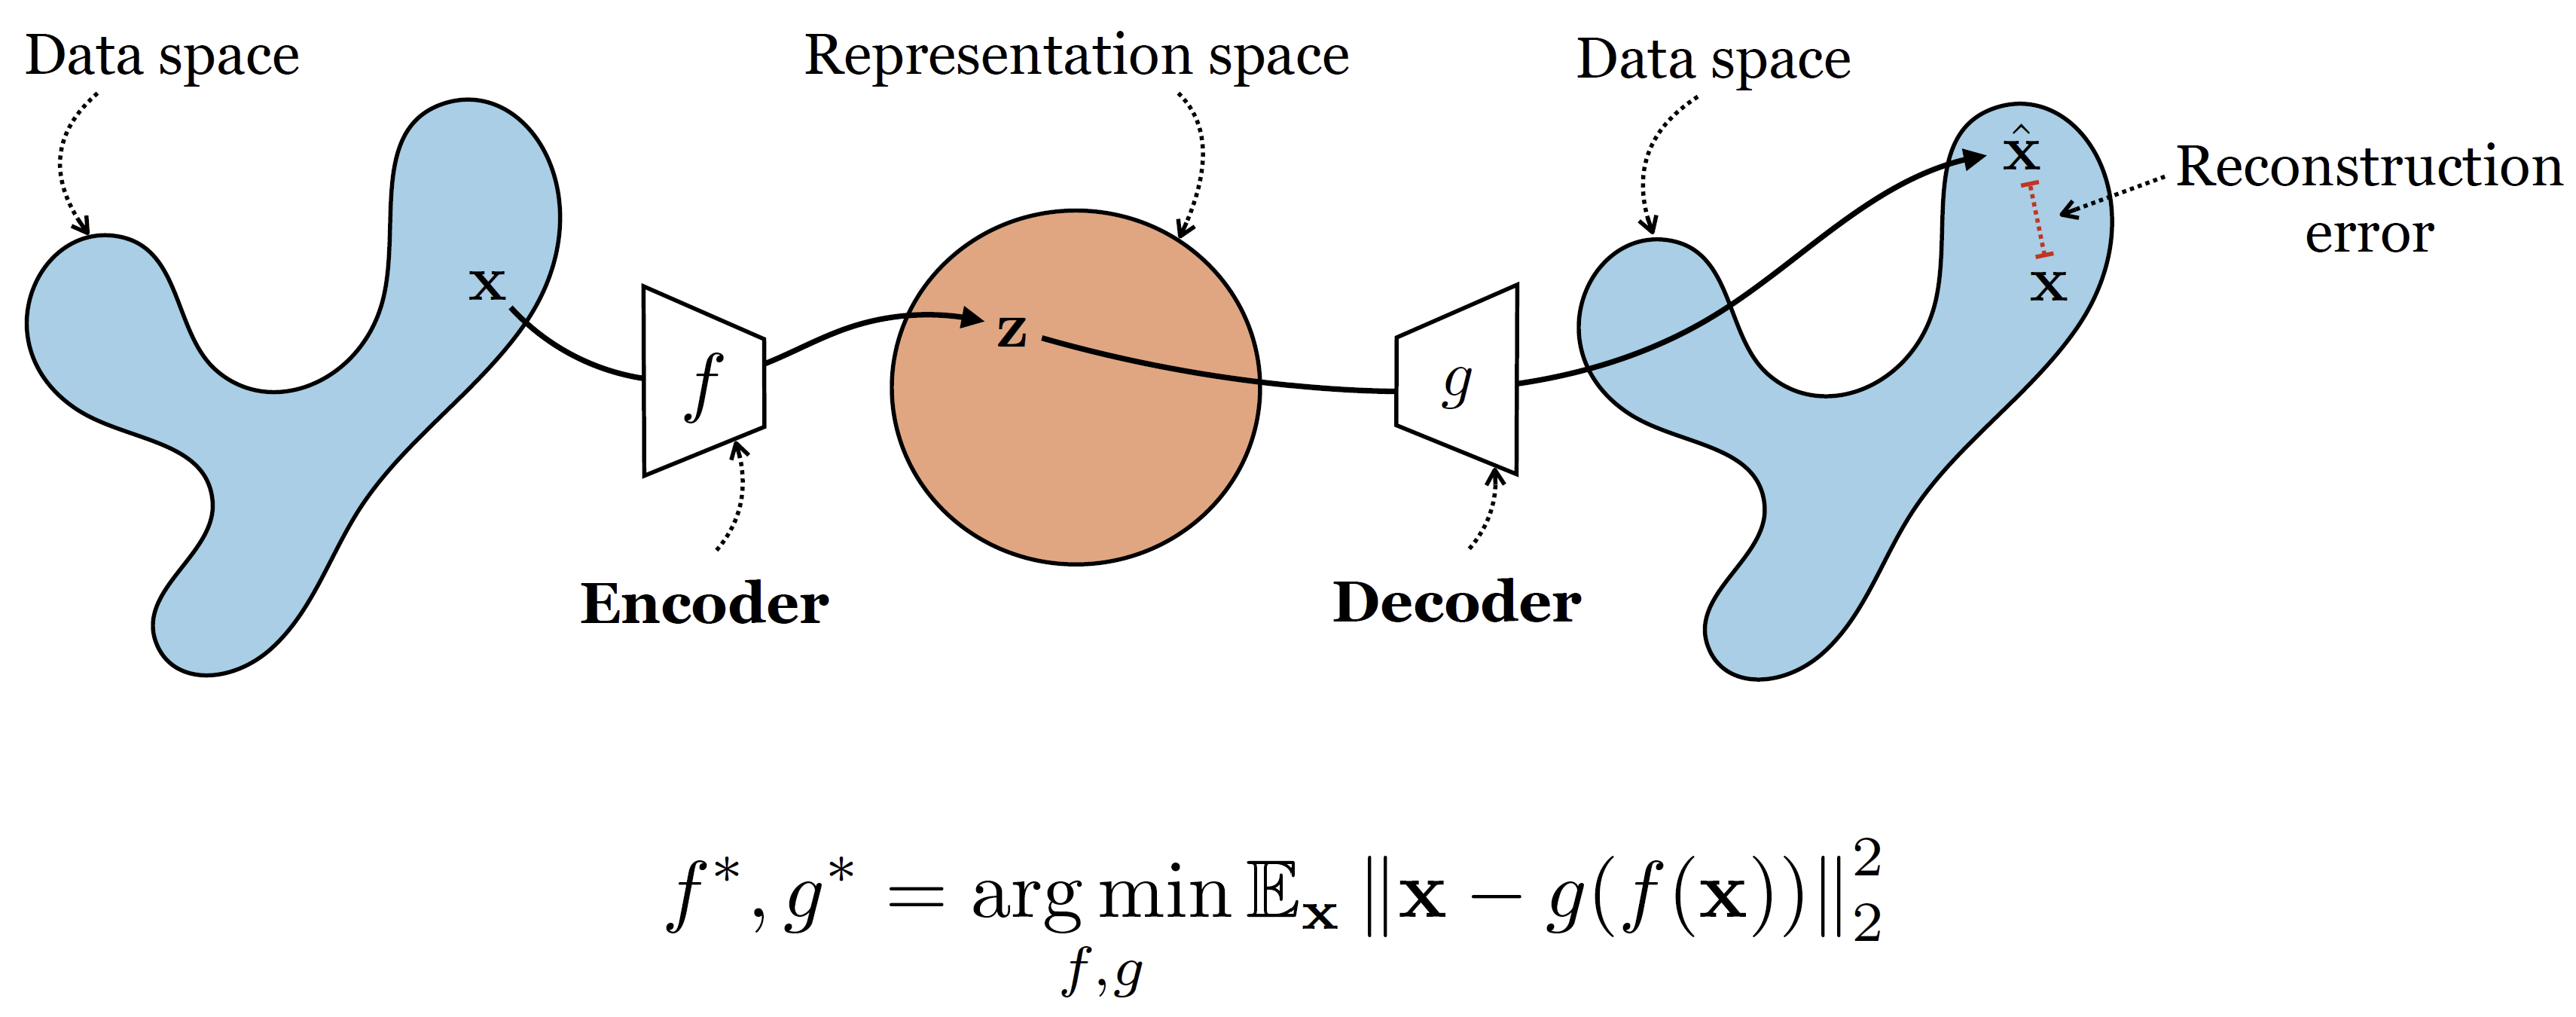







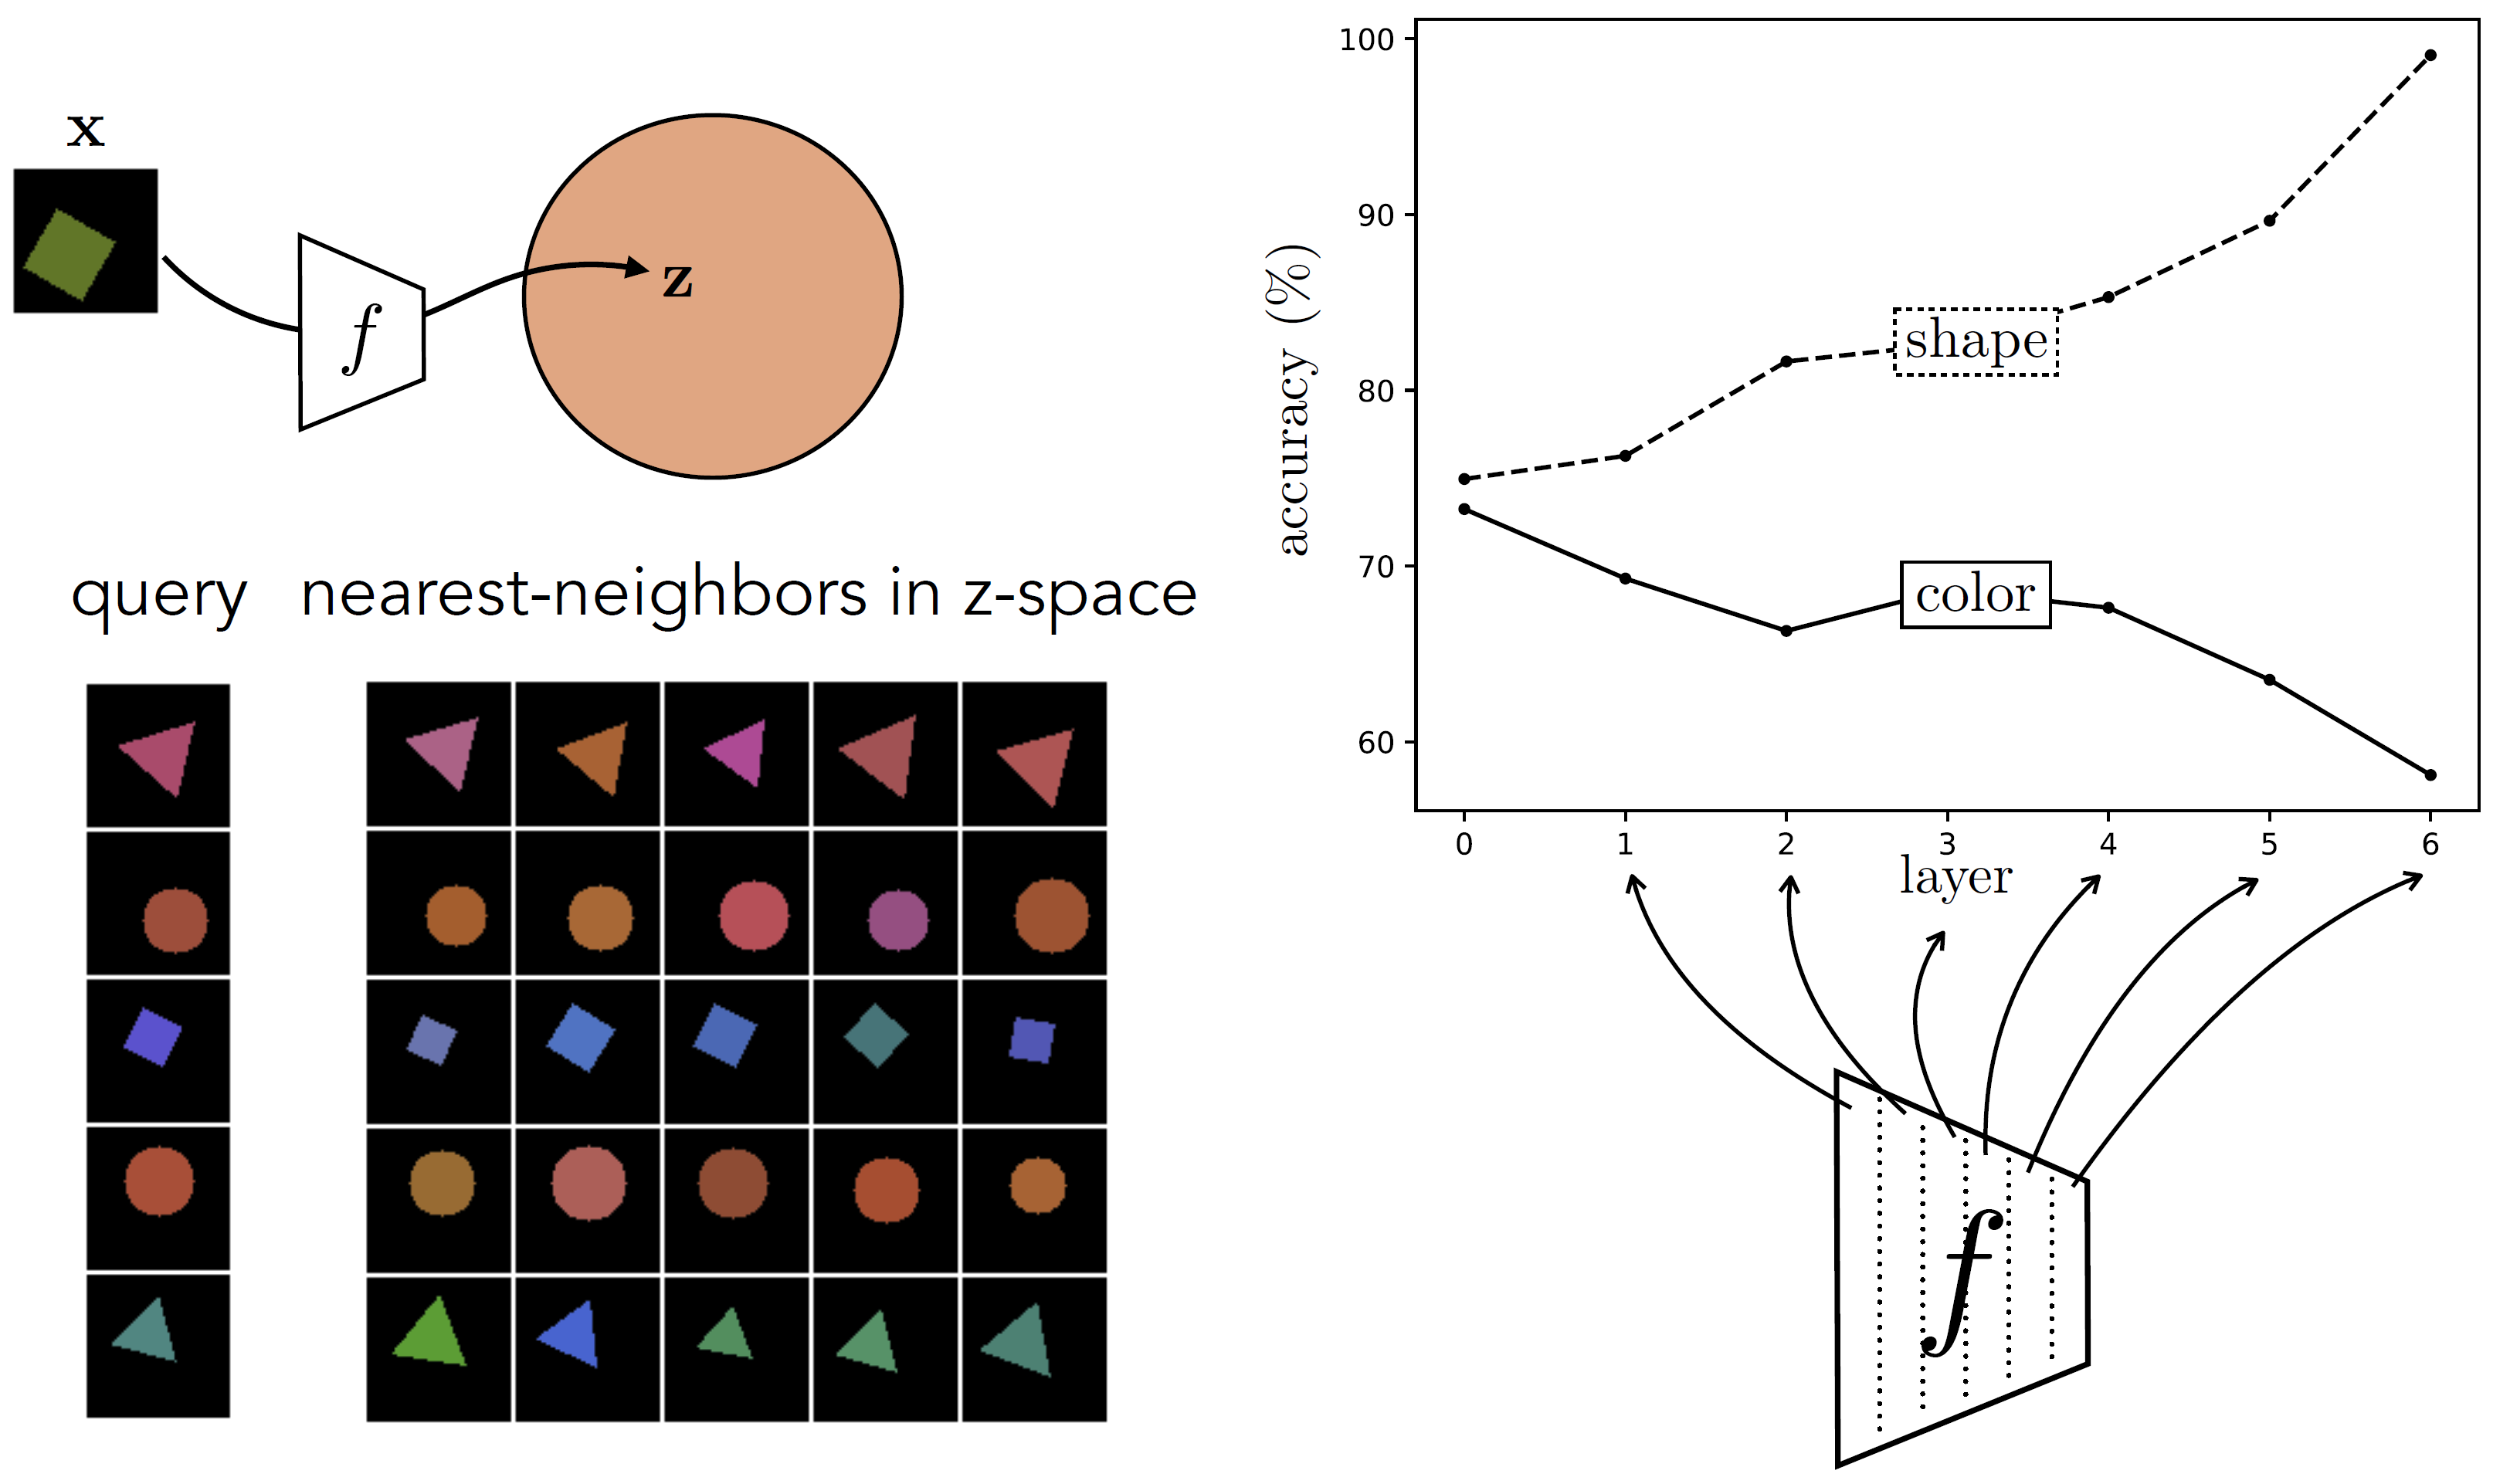






(images: Phillip Isola)

🟠 ***What Is a Good Representation?***


---

> "Generally speaking, a good representation is one that makes a subsequesnt learning task easier." ~ Deep Learning, Goodfellow et al. 2016

More concretely, good representations are:

1. Compact (minimal)
2. Explanatory (sufficient)
3. Disentangled (independet factors)
4. Interpretable
5. Make subsequent problem solving easy
6. ...?



🟠 ***How Can We Learn Good Representations?***

---

One way to learn representations is by **supervised learning**. This requires the annotations of large datasets, which is very costly and time consuming. There are other ways to learn meaningful representations using techniques in **unsupervised learning**.

In the remainder of this notebook, we will focus on representation learning in the context of molecular design. We will see how we can use chemical reasoning to find different representations of molecules.


# 2. Introduction to Molecular Featurization

🟠 ***Devising a Good Representation for Molecules***


---



From a quantum physics perspective, molecules are viewed as **systems of atoms held together by chemical bonds, where the behavior of electrons and atomic nuclei is governed by the principles of quantum mechanics**. Unlike classical physics, which treats particles as distinct entities with specific properties, quantum mechanics considers electrons in terms of probabilities and wave functions. This approach allows for the understanding of molecular properties such as bonding, shape, and reactivity through the study of electron distribution and energy levels.

While it is possible to featurized molecule based on their quantum properties, we won't focus on these methods in this notebook. Instead, we will look at **molecular graphs**. While this approach isn't as elaborative as quantum chemistry (from a theoretical point of view), it's **simpler and more flexible**. Before we dive into the implementation of graph-based featurization approaches, it's important to realize the limits of this modelling assumption.

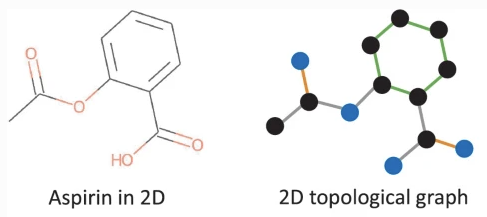

(image: [source](https://link.springer.com/chapter/10.1007/978-3-031-37196-7_2))

🟠 ***Advantages and Disadvantages of Graph-Based Molecular Modeling***


---

**Advantages:**


*  **Intuitive Representation:** Graphs provide a natural way to represent molecules, with atoms as nodes and bonds as edges, mirroring their chemical structure.

*  **Computational Efficiency:** Graphs can be efficiently processed and analyzed using established algorithms, making them suitable for large-scale computational studies.

*  **Flexibility and Generality:** Graphs can easily accommodate various molecular features like different atom types, bond orders, and even functional groups, allowing for detailed and versatile molecular modeling.

*  **Scalability:** Graph representations can scale from small molecules to large biomolecules like proteins, making them versatile for various scales of chemical modeling.



**Disadvantages:**


*  **Loss of 3D Information:** Standard graph representations lack three-dimensional structural information, which is critical for understanding many molecular properties and reactions. This includes stereochemical information and conformational information. Capturing stereochemical information (like chirality) can be challenging and may require additional layers of information or specialized graph structures.


*  **Oversimplification:** Graphs may oversimplify the molecular complexity, ignoring subtleties like electronic distribution, conformational flexibility, and non-covalent interactions.

Overall, it's important to keep in mind that the way a molecule is represented can greatly influence the results and interpretations in computational studies, leading to potential biases. The approaches that we will discuss in this notebook are very common in molecular design, but **it's important to be aware of their limitations**.

image.png

(image: [source](https://en.wikipedia.org/wiki/Protein_structure))

🟠 ***Baseline Representation: SMARTS and SMILES Strings***


---


**SMARTS** (SMiles ARbitrary Target Specification) and **SMILES** (Simplified Molecular Input Line Entry System) are both notation systems used in cheminformatics to represent the structure of chemical molecules.

**SMILES is a way to encode a chemical structure in a linear text format**. It represents the arrangement of atoms and bonds in a molecule **using strings of ASCII characters**. It includes information about atoms, bonds (single, double, triple), branching, and rings, and it's widely used for **database searches, chemical informatics, and modeling**.

**SMARTS is an extension of the SMILES format**. It's used as a language for specifying **substructure patterns** in molecules. It includes all features of SMILES and adds additional elements to define molecular patterns and properties (like atomic charges, degree of connectivity, specific bond types). SMARTS strings can be **more complex** than SMILES due to their extended capabilities for specifying a wide range of chemical features and patterns.


| Molecule                           | SMILES Representation              | SMARTS Representation                           |
|------------------------------------|------------------------------------|-------------------------------------------------|
| Water (H2O)                        | `O`                                | `[OH2]`                                         |
| Benzene                            | `c1ccccc1`                         | `[cH1]1[cH1][cH1][cH1][cH1][cH1]1`               |
| Aspirin                            | `CC(=O)OC1=CC=CC=C1C(=O)O`         | `CC(=O)OC1=C[C;H1]=[C;H1][C;H1]=[C;H1]1C(=O)O`   |
| Caffeine                           | `CN1C=NC2=C1C(=O)N(C(=O)N2C)`      | `CN1C=NC2=C1[C;H1](=O)N(C(=O)N2C)`               |
| Lithium Aluminium Hydride (LiAlH4) | `[Li+].[AlH4-]`                    | `[Li+].[AlH4-]`                                   |


🟠 ***SMILES String of a Chemical Reaction***


---
Main idea: SMILES strings of molecules seperated by `.` characters. Reactants and products are separated by `>>` characters.

Example: **CC(Cl)=O.OC>>CC(OC)=O.Cl**

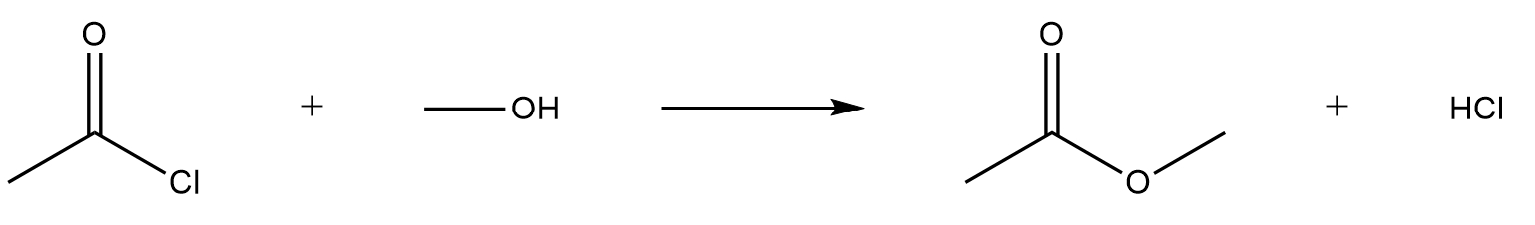


⚫ ***Coding Task***


---

The code below is an illustration that molecules can be represented as graphs. The first code cell illustrates how to visualize molecule from their SMILES string using RDKit, showing te equivalence between the graph representation to the string representation.

The second code cell illustrates how to form a graph from the molecular representation. Convinve yourself that by adding the appropriate node and edge features (for example, bond types), a graph representation can be a very powerful representation for a molecule.

The code below is just an illustration. Visualizing molecules from their SMILES strings and forming molecular graphs are come methodologies in molecular design. Although we won't use this code later in this notebook, we highly recommended that you familiarize yourself with this code.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import Image

caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)" # SMILES string for caffeine

caffeine_molecule = Chem.MolFromSmiles(caffeine_smiles) # Parse the SMILES string to an RDKit molecule object

Draw.MolToFile(caffeine_molecule, 'caffeine_molecule.png') # Draw the molecule and save it as an image

Image(filename='caffeine_molecule.png') # Display the image


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)" # SMILES string for caffeine

caffeine_molecule = Chem.MolFromSmiles(caffeine_smiles) # Parse the SMILES string to an RDKit molecule object

G = nx.Graph() # Create a graph

for atom in caffeine_molecule.GetAtoms(): # Add nodes with atom labels
    G.add_node(atom.GetIdx(), label=atom.GetSymbol())

for bond in caffeine_molecule.GetBonds(): # Add edges with bond types
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), label=bond.GetBondType())

pos = nx.spring_layout(G)  # Sets positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=700) # Draws nodes

nx.draw_networkx_edges(G, pos, width=6) # Draws edges

nx.draw_networkx_labels(G, pos, nx.get_node_attributes(G, 'label'), font_size=20) # Draws node labels

plt.axis('off')
plt.show()


# 3. Molecular Fingerprints

🟠 ***What are Molecular Fingerprints?***

---

Molecular fingerprints encode the structure of a molecule in a way that a computer can process. They do this by representing the presence or absence of certain chemical features or patterns within the molecule [1]. These fingerprints are essentially **a series of bits** that encode information on: functional groups (circular fingerprints), molecular shapes (atom-pair fingerprints), and other molecular features or patterns.


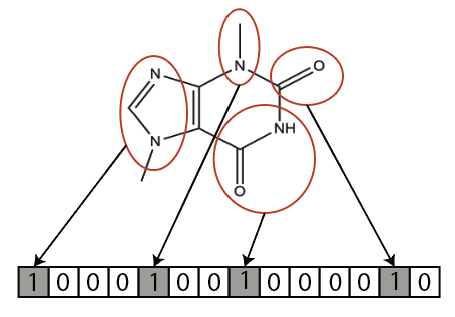

🟠 ***Applications and Limitations***

---

We already saw one application of molecular fingerprints in lecture 2: they allowed us to visualize a large chemical space. Indeed, molecular fingerprints are used to describe large and diverese datasets, conduct virtual screening, and even for **property prediction**.

The main limitation of molecular fingerprints is that it's difficult to return to the original structure. This makes most **interpretability studies highly complex**, as most state-of-the-art models are themselves hard to interpret.


🟠 ***Bit Collisions***

---

Sometimes, multiple substructures are hashed to the same the same bit index, which leads to **bit collisions**. This can be solved by **increasing the length** of the fingerprint vector (many encoding algorithm support various vector sizes). However, it's important to remember that longer vectors may cause machine learning models to **overfit**. This is known as the "curse of dimensionality": the amount of data required to obtain meaningful results may increase with the number of dimensions. The dimensions can often be reduced by incorporating chemical insight.

🟠 ***Morgan Fingerprints***

---

Morgan fingerprints encode the structure of a molecule by considering the **environment around each atom up to a specified radius**. They are generated using the Morgan algorithm applied to atom invariants, which typically include connectivity information. The process involves iterating over each atom and considering its neighbors within the given radius to create a bit vector.The bit information can be interpreted to understand the contribution of specific atoms [2].

🔴 ***Morgan Algorithm***

---

1. Initialize all atom to a value of 1.
2. Assign each atom a new value by summing the values of all the neighbors up to a pre-defined radius.
3.  Repeat this until the number of values doesn't increase
anymore or you have reached some iteration limit.
4. Assign priorities according to invariants. Disambiguate ties by some atomic/bonding priorities.

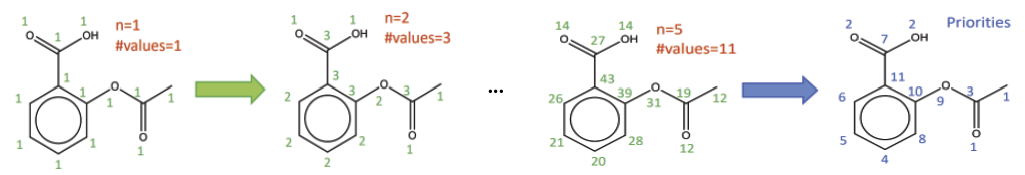

(source: Martin Vogt, B-it Life Science Informatics, Rheinische Friedrich-Wilhelms-Universität Bonn)


The simplicity of the Morgan Algorithm makes Morgan fingerprints very practical for various applications. However, the invariants might be too simple at times: they aren't able to distinguish different atom types bond orders initially, not all atoms can be distinguished sufficiently at the end, and the algorithm may never converge.

⚫ ***Coding Task***

---

In this coding task we will demonstrate how to encode molecules using Morgan fingerprints. We will also examine some of the properties of Morgan fingerprints and see how to detect bit collisions. Finally, we will explore one application of molecular fingerprints, which allows us to get numeric similarity scores between molecules.

Some of the code in this coding task was taken from a [CAS tutorial by Guilian Luchini](https://www.youtube.com/watch?v=4V7V2GlxOto&ab_channel=CenterforComputer-AssistedSynthesis).

🟡🟡🟡 First, let's visualize the molecules. It can be very tempting to just stare at SMILES string, but remember that SMILES strings are equivalent to the graph representation, which is much easier for us to understand.

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import numpy as np

DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstron = 100
DrawingOptions.bondLineWidth = 3

In [ ]:
penicillin = 'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)N' # SMILES string of penicillin
amoxicillin = 'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C)OC)C(=O)O)N' # SMILES string of amoxicillin

mol_penicillin = Chem.MolFromSmiles(penicillin) # Transforming SMILES strings to RDKit molecule objects
mol_amoxicillin = Chem.MolFromSmiles(amoxicillin)

Draw.MolsToGridImage([mol_penicillin, mol_amoxicillin], subImgSize = (400, 400))

🟡🟡🟡 Now, let's form the fingerprints. The code below is an example for how to form Morgan fingerprint. Notice that we are passing **RDKit molecule objects and not SMILES strings**.

In [ ]:
info_1 = dict() # These dictionaries will be used to store some information about the encoding process that will allow us to go back from bits to substructure later on
info_2 = dict()

penicillin_fp = AllChem.GetMorganFingerprintAsBitVect(mol_penicillin, radius = 3, nBits = 256, bitInfo = info_1) # Examples for how to form Morgan fingerprints with radius of 3 and 256 dimensions
amoxicillin_fp = AllChem.GetMorganFingerprintAsBitVect(mol_amoxicillin, radius = 3, nBits = 256, bitInfo = info_2)

🟡🟡🟡 Let's inspect the fingerprints. Notice that both have the 5-th bit set to 1. Try to run the code cells below: you should get the same substructure for both fingerprints. If this isn't the case, a bit collision might have occured. Re-run the fingerprint generation code a few times and you should observe the expected behavior. You can change the bit values to experiment with the code: try to see what other substructures are encoded.

In [ ]:
def fp_to_np(fp):
  """
  The object returned by the RDKit encoding method above is an RDKit BitVect. While it's pretty easy to use,
  sometimes is can be easier to use a numpy array instead. This function takes a fingerprint as an RDKit BitVect object
  and returns the equivalent representation as a numpy array.

  Args:
    fp: A fingerprint as an RDKit BitVect object.

  Returns:
    The equivalent representation as a numpy array.
  """

  arr = np.zeros((1,), dtype=int)

  # Convert the RDKit fingerprint to the NumPy array
  Chem.DataStructs.ConvertToNumpyArray(fp, arr)
  return arr

In [ ]:
print(fp_to_np(penicillin_fp))

In [ ]:
print(fp_to_np(amoxicillin_fp))

In [ ]:
Draw.DrawMorganBit(mol_penicillin, 5, bitInfo = info_1, useSVG=True)

In [ ]:
Draw.DrawMorganBit(mol_amoxicillin, 5, bitInfo = info_2, useSVG=True)

🟡🟡🟡 One way to check whether bit collisions have occured is to increase the dimensions of the fingerprint vectors. This is also called "unfolding the fingerprint". Suppose that we have a list of molecules. If the number of unique bits that are set to 1 (i.e., bits that are set to 1 in one and only one fingerprint) increases as the number of dimensions increases, it means that theoretically we could have used more space to encode the information from the molecule. Let's see how this is observed in practice. Complete the TODOs in the code cells below and complete the `count_unique_ones` and `compare_dim` functions. Hint: for the `count_unique_ones` function you may iterate over the bits and compare them. However, there's a much cleaner and shorter solution that uses `np.logical_or`. You may read more about the logical or operator [here](https://en.wikipedia.org/wiki/Logical_disjunction).

In [ ]:
import math
import matplotlib.pyplot as plt
from IPython.display import SVG, display

In [ ]:
def count_unique_ones(fp_list):
    """
    Counts the number of unique bits set to 1 across fingerprints in the list.

    Args:
      fp_list: List of numpy arrays representing fingerprints.

    Returns:
      Count of bits set to 1 across all fingerprints. (int)
    """

    # TODO
    # Complete the function based on the provided docstring

In [ ]:
def compare_dim(fp_dims, mols):
  """
  Compares the number of unique bits for different fingerprint dimensions for a specified list of molecules.

  Args:
    fp_dims: a list of integers specifying the different dimensions.
    mols: a list of molecules, where each molecule in an RDKit molecule object.

  Returns:
    A list of integers specifying the number of unique bits for the fingerprints of the molecules in the mols argument.
    The i-th entry in the returned list corresponds to the i-th dimension in the fp_dims list.
  """

  # TODO
  # Complete the function based on the provided docstring

fp_dims = [256, 512, 1024, 2048, 4096, 8196, 16392, 32784, 65568]
mols = [mol_penicillin, mol_amoxicillin]
unique = compare_dim(fp_dims, mols)

# Visualization
fig, ax = plt.subplots()
ax.plot(unique)
xticks = plt.xticks(range(len(fp_dims)), fp_dims)
ax.yaxis.get_major_locator().set_params(integer = True)

🟡🟡🟡 Based on the generated visualization, what number of bits could be sufficient to avoid bit collisions? What dimension would you recommend to use for practical applications? Why?

🟡🟡🟡 Answer:

🟡🟡🟡 Now let's see an application of molecular fingerprints. One of the manipulations that encoding molecules as binary vectors allows us to do is to score the similarity between different molecule using some mathetmatical distance metric. A common metric that is oftenly used in molecular design is the Tanimoto similarity.  For two vectors $A$ and $B$ their Tanimoto similarity is defined as:

\begin{equation}
    d(A,B) = \frac{A \cdot B}{\|A\|^2 + \|B\|^2 - A \cdot B}
\end{equation}

The Tanimoto similarity is compatible with binary vectors and simple to calculate. It also strikes a balance between identifying molecular similarity and diversity. This is because for binary vectors, the Tanimoto similarity can also be interpreted as:

\begin{equation}
    d(A,B) = \frac{\text{Common 1 bits to both } A \text{ and } B}{\text{1 bits in } A + \text{1 bits in } B - \text{Common 1 bits to both } A \text{ and } B}
\end{equation}

image.png


(image: [source](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.02%3A_Similarity_Coefficients))

 This is crucial in molecular design applications, where both finding similar compounds (for structure-activity relationships) and exploring diverse chemical spaces (for novel drug discovery) are important. You can read more about this [here](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0069-3).

 Let's start by implementing the `tanimoto_similarity` functio below. Hint: use the second definition above and the `np.logical_and` and `np.logical_or` built-in functions to get a neat and short solution. You may not import any additional methods in this part.

In [ ]:
def tanimoto_similarity(fp1, fp2):
  """
  Calculates the Tanimoto similarity between two fingerprints.

  Args:
  fp1: The first fingerprint as a mumpy array.
  fp2: The second fingerprint as a numpy array.

  Returns:
    Tanimoto similarity score. (float, between 0 and 1)
  """

  # TODO
  # Complete the function based on the provided docstring

🟡🟡🟡 In the code cells below we provide code for visualization and Tanimoto similarity comparisons (the Tanimoto similarity function is imported as `FingerprintSimilarity`). The  You are given a list of molecules. Choose 3 molecules such that two of them are structuraly similar to one another, while the third one isn't, and compare their Tanimoto similarities. We recommend that you try various combinations, but you are only required to submit one combination. Finally, comment on whether the Tanimoto similarity scores make intuitive sense.

In [ ]:
molecules_list = ['Cc1ccccc1', 'CN1C=NC2=C1C(NC(N2C)=O)=O', 'C#N', 'NC(C(C)=O)CSC', 'C12=CC=C3C(C=CC=C3)=C1C=CC=C2', 'Clc1ccccc1', 'CN1C=NC2=C1C(N(CCC)C(N2C)=O)=O', 'C12=CC=CC=C1C=CC=C2', 'CC#N', 'CCC(N)C(C)=O']

molA = Chem.MolFromSmiles(# TODO: choose the first molecule)
molB = Chem.MolFromSmiles(# TODO: choose the second molecule)
molC = Chem.MolFromSmiles(# TODO: choose the third molecule)

Draw.MolsToGridImage([molA, molB, molC], subImgSize = (400, 400))

In [ ]:
fpA = AllChem.GetMorganFingerprintAsBitVect(molA, 3, nBits = 64)
fpB = AllChem.GetMorganFingerprintAsBitVect(molB, 3, nBits = 64)
fpC = AllChem.GetMorganFingerprintAsBitVect(molC, 3, nBits = 64)

print(f'molA and molB similarity: {tanimoto_similarity(fpA, fpB):.3f}')
print(f'molA and molC similarity: {tanimoto_similarity(fpA, fpC):.3f}')

🟡🟡🟡 Answer:

🟠 ***Additional Encoding Methods***

---

**AtomPair Fingerprints:** AtomPair fingerprints represent a molecule based on the pairs of atoms and the distances between them. Each pair of atoms contributes to the fingerprint by encoding their types and the number of bonds separating them. This fingerprint type is useful for capturing long-range interactions between atoms in a molecule. The usual metric for similarity between atom-pair fingerprints is the Dice similarity.

**RDKit Fingerprints:** The RDKit fingerprint is a type of topological fingerprint generated by considering subgraphs in the molecule. It allows customization in terms of path length, whether to include hydrogen atoms, and whether to consider bond orders. The fingerprint is a bit vector where each bit represents the presence of a specific path within the molecule. The RDKit fingerprint generator can provide detailed information about the atoms and paths contributing to each bit in the fingerprint.

**Topological Torsion Fingerprints:** Topological Torsion fingerprints are based on the topological relationships between sets of four bonded atoms (torsions) in a molecule. Each unique torsion contributes to the fingerprint, capturing the three-dimensional aspect of molecular structure. This type of fingerprint is useful for encoding stereochemical information. The Topological Torsion fingerprint generator can provide information about the atom indices involved in the paths contributing to each bit.

([source](https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html))

⚫ ***Coding Task***

---
In the code cells below we have summarized for you common methods to generate molecular fingerprints using RDKit. Run the code and visuallize the different fingerprints using the provided functions. Notice that although they encode them same molecule, they all look quite different from each other. Finally, you will have a chance to see how choosing the fingerprints can affect your downstream task.


In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit

In [ ]:
mol = Chem.MolFromSmiles('CN1C=NC2=C1C(NC(N2C)=O)=O') # Caffeine as an example

In [ ]:
# Defining fingerprint generators

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius = 3, fpSize = 2048) # For chemical reactions use directy: rdChemReactions.FingerprintType.MorganFP

rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize = 2048) # For chemical reactions use directy: rdChemReactions.FingerprintType.RDKitFP

apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize = 2048) # For chemical reactions use directy: rdChemReactions.FingerprintType.AtomPairFP

ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize = 2048) # For chemical reactions use directly: rdChemReactions.FingerprintType.TopologicalTorsion

In [ ]:
morgan_fp = mfpgen.GetFingerprint(mol) # Morgan fingerprint

atom_pair_fp = apgen.GetFingerprint(mol) # Atom pair fingerprint

rdkit_fp = rdkgen.GetFingerprint(mol) # RDKit fingerprint

topological_torsion_fp = ttgen.GetFingerprint(mol) # Topological torsion fingerprint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_fingerprints(fp_list, fp_length):
    """
    Visualizes a list of fingerprints.

    Args:
      fp_list: List of fingerprints as NumPy arrays.
      fp_length: Length of the fingerprint (number of bits). (int)

    Returns:
      Nothing. Generates a plot for each fingerpritn showing 1 bits as red stripes and 0 bits as gray stripes.
    """

    num_fps = len(fp_list)
    fig, axes = plt.subplots(num_fps, 1, figsize=(20, num_fps * 2))

    if num_fps == 1:
        axes = [axes]

    for i, fp in enumerate(fp_list):
        img = np.zeros((1, fp_length, 3))
        img[0, fp == 1, :] = [1, 0, 0]
        img[0, fp == 0, :] = [0.9, 0.9, 0.9]

        axes[i].imshow(img, aspect="auto")
        axes[i].set_axis_off()
        axes[i].set_title(f'Fingerprint {i+1}')

    plt.tight_layout()
    plt.show()

visualize_fingerprints([fp_to_np(morgan_fp), fp_to_np(atom_pair_fp), fp_to_np(rdkit_fp), fp_to_np(topological_torsion_fp)], 2048)

🟡🟡🟡 Complete the function below, which does the following:
1. The function takes a pair of molecule SMILES strings and a dimension of fingerprints.
2. The function encode the molecules into each of the different 4 fingerprints that we saw above.
3. The function computes the Tanimoto similarity score for each fingerprint type. For example, for Morgan fingerprints, compare the Tanimoto similarity of the two molecules.

You may use all the code we have written or imported so far. Here you can also use an imported function for the Tanimoto similarity: `FingerprintSimilarity`. You can call it in this way: `FingerprintSimilarity(fp1, fp2)`, where `fp1` and `fp2` are fingerprint objects as returned by RDKit.

After you complete the function, take a look at the results. We hope that now you are convinced that although fingerprints may seem very convenient at times, you should always interpret the results carefully!

In [ ]:
from rdkit.DataStructs import FingerprintSimilarity

def similarity_for_fingerprints(mol_smiles_1, mol_smiles_2, fp_dim):
  """
  Computes the Tanimoto similarity for different fingerprints.

  Args:
    mol_smiles_1: SMILES string of the first molecule.
    mol_smiles_2: SMILES string of the second molecule.
    fp_dim: dimension of the fingerprint.

  Returns:
    Nothing, prints the Tanimoto similarty score for the different fingerprints
  """

  # TODO
  # Complete the function based on the docstring

In [ ]:
similarity_for_fingerprints('Cc1ccccc1', 'Clc1ccccc1', 256)

🟠 ***State of the Art Representations***

---

**In machine learning:**


*   State of the art representation learning has been achieved by supervised learning models for a long time.
*   Quite recently, unsupervised learning methods have outpreformed supervised learning. This has to do mainly with Masked Autoencocders. There is some development in contrastive learning too.

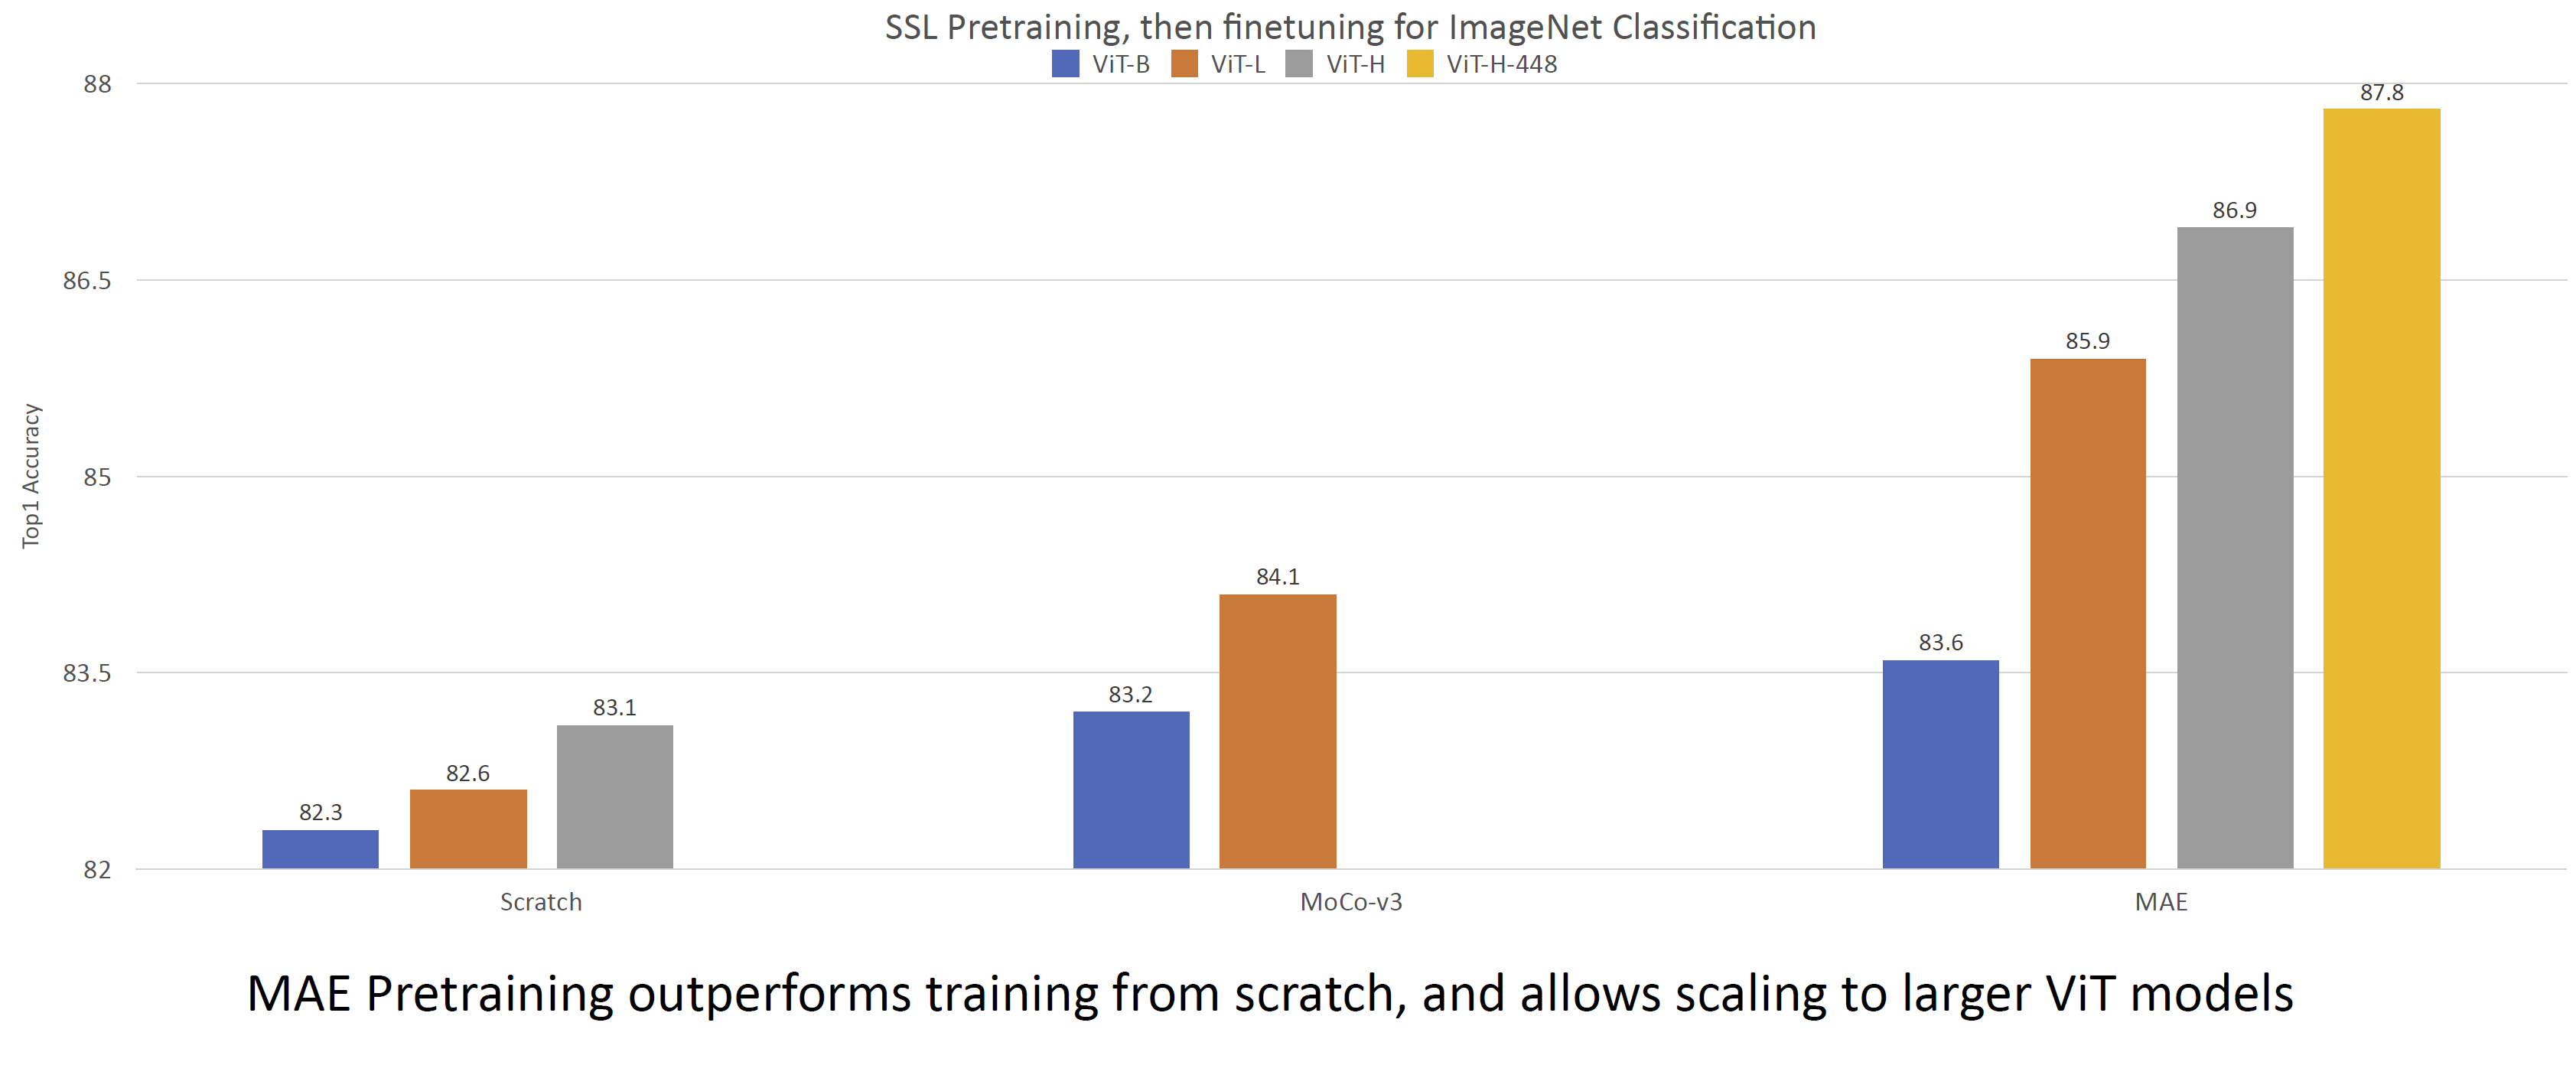

(image: He et al, "Masked Autoencoders are Scalable Vision Learners", CVPR 2022)

**In molecular design:**

Good sample paper:

> Beker W, Gajewska EP, Badowski T, Grzybowski BA. Prediction of Major Regio-, Site-, and Diastereoisomers in Diels-Alder Reactions by Using Machine-Learning: The Importance of Physically Meaningful Descriptors. Angew Chem Int Ed Engl. 2019 Mar 26;58(14):4515-4519. ([link](https://onlinelibrary.wiley.com/doi/10.1002/anie.201806920))

*  The paper underscores the importance of feature selection with machine learning models.
*  Predices Diels-Alder reaction outcomes.
*  Limited number of examples: 6355.
*  Achieved high accuracy: 93.6% and 91.3% for regioselectivity and site-selectivity, respectively.

How did they achieve such high accuracies? Well, this had to do with the machine learning methods, but the main reasong was the **incorporation of prior domain knowledge into the feature selection**:

*  High accuracies were achieved only if the machine learning model was provided with some chemical "insight" abbout the reaction.

*  The key to high accuracies isn't the choice of specific machine learning method, but rather the use of features that capture key characteristics.

image.png

(slide credit: Nils Gonnheimer, Damien Dablain, CAS introduction to molecular featurization. [link](https://www.youtube.com/watch?v=PHU3qLwncDI&ab_channel=CenterforComputer-AssistedSynthesis)

# 4. Common Machine Learning Models

🟠 ***Why Should We Even Use Machine Learning?***

---
So far we have seen different methods that allow us to encode molecules, with the goal being to pass the features to machine learning models that will allow us to perform some downstream task of interest. But why should we even bother to do this? We have seen that encoding molecules ignores information about many chemical and physical features. Furthermore, machine learning models often not interpretable, which puts their trustworthiness in doubt.

Despite these disadvantages, there is an ever growing demand for machine learning models in the molecular design domain. It turn out that even some good approximations are valuable, and researchers are constantly trying to improve the performance of machine learning models on problems from molecualr design.

It turns out that machine learning models are incredibly good at scanning vast chemical spaces, and in the next few sections, we will start to see how.

(side note: do you notice what's wrong with this picture?)

image.png

(image: [source](https://www.worldpharmatoday.com/articles/the-future-of-high-throughput-screening/))


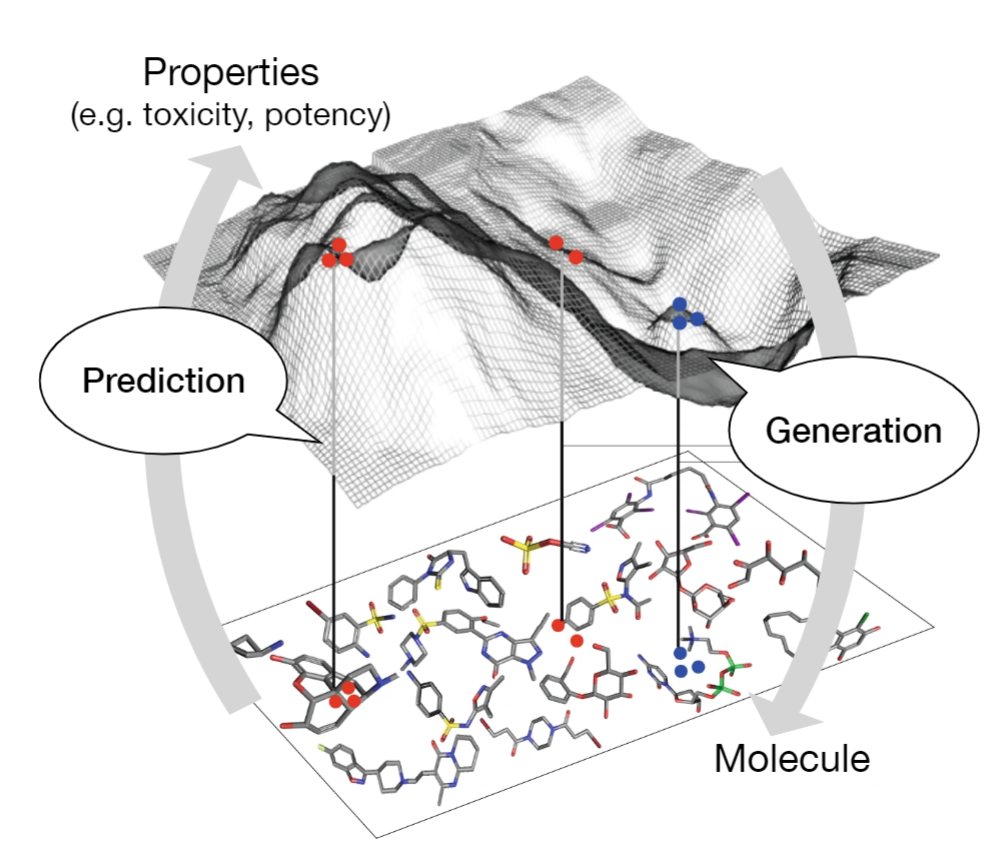

(image: Gromskit et al. 2019)


🟠 ***Supervised Learning In a Nutshell***

---
We start with a labeled data: assume $X\in \mathbb{R}^d$ and $y\in Y$ (a set of possible labels). Overall, a sample of $n$ labeled datapoints can be written as $\{(x^i, y^i), i \in 1,2,..., n\}$. We assume that $(x^i, y^i) \sim P$ are i.i.d samples of some intractable distribution $P$, which we are trying to learn.

A classifier $h:\mathcal{X} \mapsto \mathcal{Y}$ is a function from the space of features to the space of labels. In this case we will treat $\mathcal{Y}$ as a categorical distribution of $k$ labels: $\Delta_{k-1}$ ($k-1$ indicates the degrees of freedom since $\sum_{i}p_i = 1$). Usually, we parameterize the classifier over some parameters $\theta$ (e.g., the weights of some neural network), amd we wrote $h_{\theta}(x) = [P(y = 1 |x, \theta), ..., P(y = k|x, \theta)]$.

To learn a good classifier we need to use some loss function to score the classifier's prediction. For example: $\mathcal{L}(y, h_{\theta}(x)) = -\log P(y|x, \theta)$, where in this case $y$ is the true label of $x$ and $h_{\theta}(x)$ is the classifier's prediction.

To learn the classifier, we need to minimize the empirical risk with respect to $\theta$: $R_n(h_{\theta}) = \frac{1}{n}\sum_{i=1}^n \mathcal{L}(y^i, h_{\theta}(x^i))$.

Ideally, we want the chosen classifier's risk to be as close as possible to the theoretical risk/test risk: $R(h) = \mathbb{E}_{(x, y)\sim P}[\mathcal{L}(y, h(x))]$ (notice that here we assume that the training and test sets are sampled from the same distribution). Notice that $R_{n}(h)\rightarrow R(h)$ as $n$ goes to infinity.

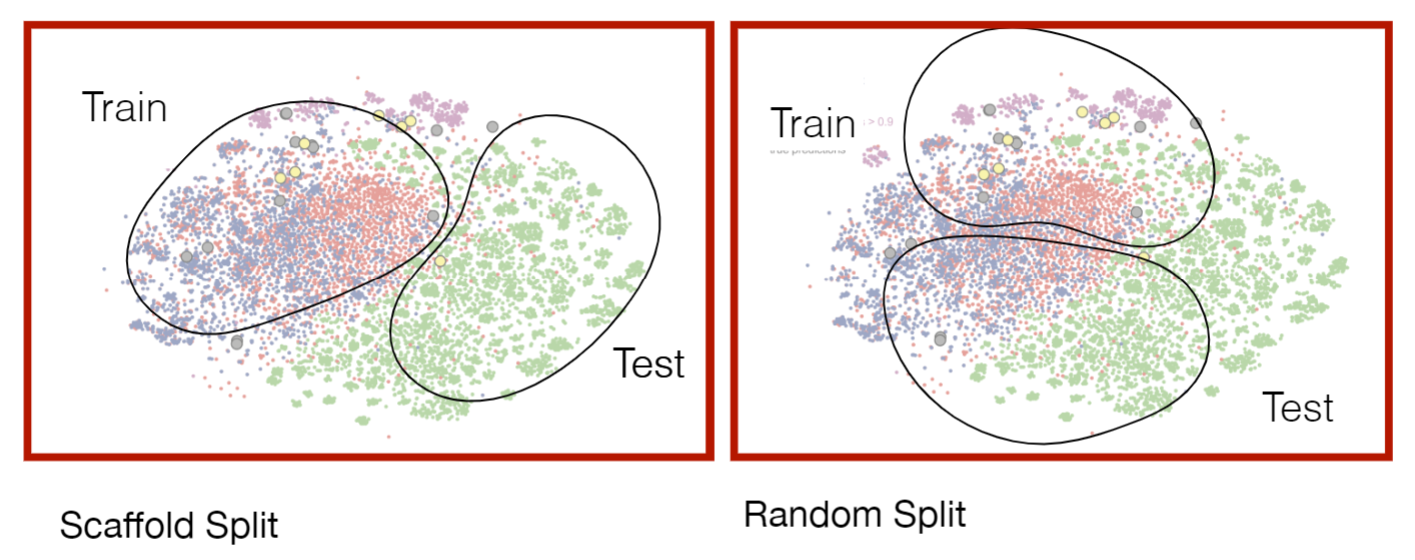

(image: MIT 6.8701)

The empirical risk minimizer is the classifer that minimizes the emprical risk, $h_{\hat{\theta}}$. We have the following relationship:

$$R(h_{\hat{\theta}}) \leq R_n(h_{\hat{\theta}}) + c(n, \mathcal{H}, \delta),$$

where $c(n, \mathcal{H}, \delta)$ us some constant depanding on:

*  $n$ is the number of training samples. Larger $n$ means more generalizable model, so lower $c$.
* $\mathcal{H}$ is the set of hypotheses from which we choose the classifier. A larger size of $\mathcal{H}$ means more optimized model and less generalizable, so larger $c$.
* $\delta$ is a certainty threshold that indicates "with probability $1-\delta$ that aforementioned relationship holds."

**Notice the complexity-generalizability tradeoff**.

🟠 ***Multi-layer Preceptron (MLP)***

---
A Multi-Layer Perceptron (MLP) is a type of a feedforward neural network (FFNN). Here's a breakdown of its key characteristics:

* **Layered Structure**: An MLP consists of multiple layers of nodes in a directed graph. These layers are typically categorized into three types:

    *  Input Layer: This layer receives the input signal to be processed.
    *  Hidden Layers: One or more hidden layers where the actual processing is done through a system of weighted 'connections'. The number of hidden layers and the number of nodes in each hidden layer can vary, greatly influencing the network's capabilities.
    * Output Layer: The layer that produces the output of the network.

* **Nodes (or Neurons)**: Each node in the layers (except for the input nodes) is a neuron that uses a nonlinear activation function, which allows the network to learn complex patterns.

*  **Feedforward Network**: In an MLP, the data flows in one direction from the input to the output layer, possibly after passing through multiple hidden layers. There are no cycles or loops in the network, differentiating it from recurrent neural networks.

*  **Backpropagation for Learning**: MLPs use a method called backpropagation for training the network. Backpropagation involves adjusting the weights of the network in order to minimize the difference between the actual output and the desired output.

*  **Application in Approximating Functions:** MLPs are well-suited for problems where the goal is to create a model that maps a set of inputs to outputs, effectively learning a function. This makes them useful for tasks like classification, regression, and even feature learning in complex datasets.

*  **Universality Theorem:** One of the remarkable properties of an MLP is its ability to approximate any continuous function, given sufficient number of neurons in the hidden layers. This is known as the universal approximation theorem.

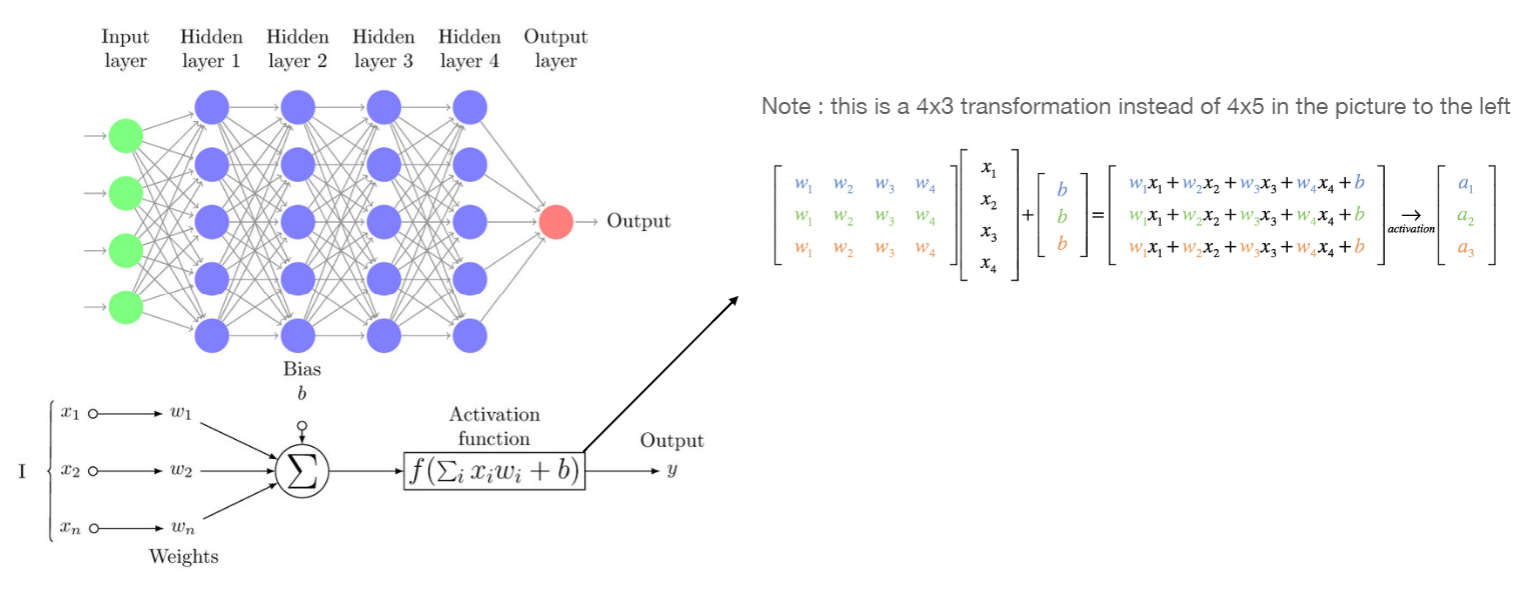

(image: Pérez-Enciso, & Zingaretti, Laura. (2019). A Guide for Using Deep Learning for Complex Trait Genomic Prediction
Each “layer” computes a linear transformation of its input)

Examples of non-linearities:

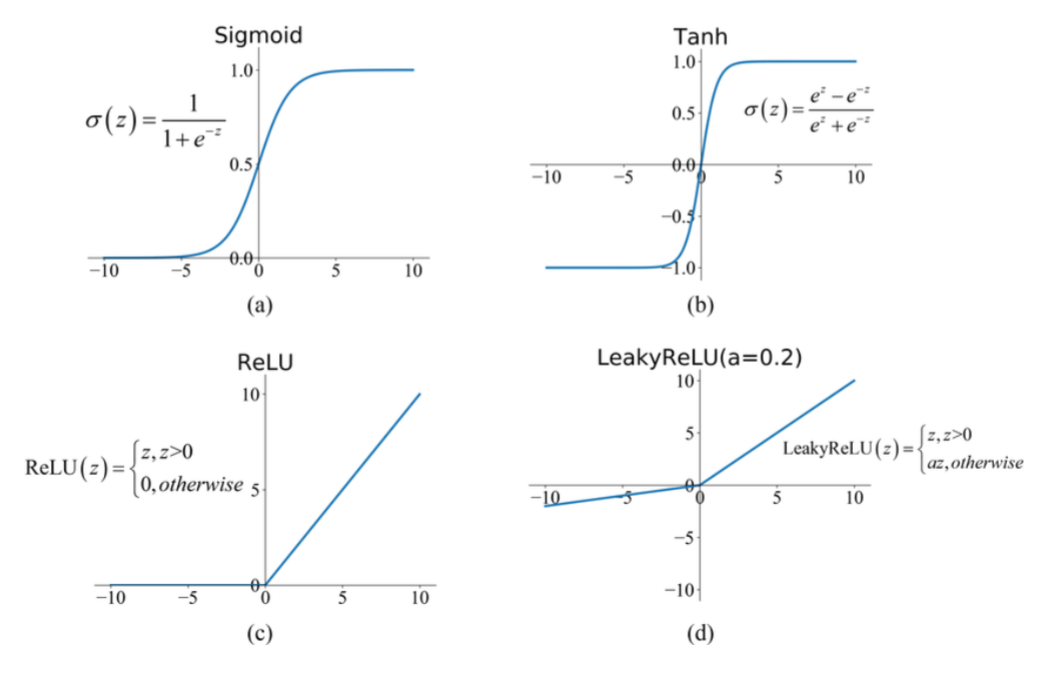

🟠 ***Support Vector Machine/Classifier (SVM/SVC)***

---

This is a powerful and quite simple, supervised machine learning algorithm used for both classification and regression tasks, though it's more commonly used for classification. It's particularly well-suited for complex but small- or medium-sized datasets.

The basic idea of an SVM is to find a hyperplane (in two-dimensional space, this would be a line) that best separates the classes of data points. In a two-class classification problem, the algorithm creates a line or a hyperplane that divides the data points into two classes, and the aim is to maximize the margin between this line and the nearest points from both classes, which are considered the "support vectors".

SVMs are usually slower than their neural network couterparts. This is because SVM training requires solving the a Lagrangian dual problem. This is a quadratic optimization problem in which the number of variables is very large.

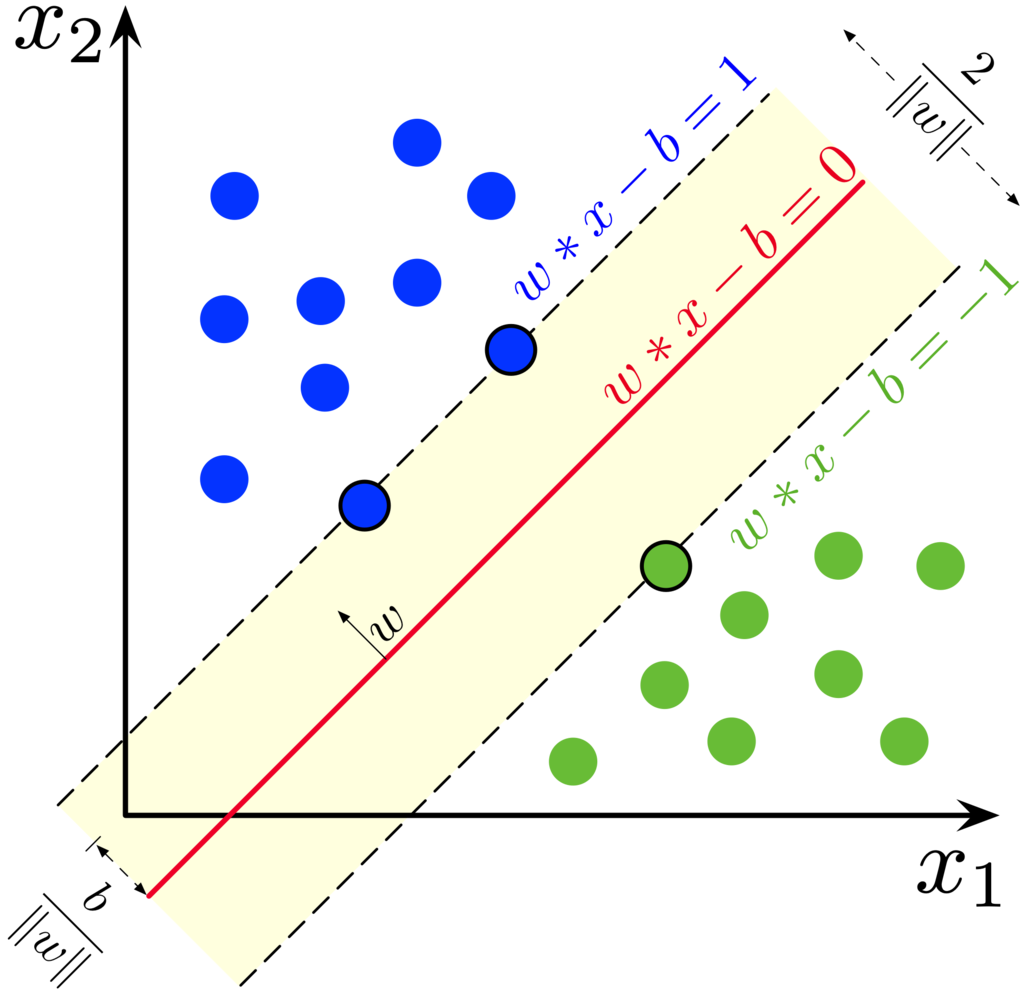

(image: [source](https://en.wikipedia.org/wiki/Support_vector_machine))

🟠 ***Random Forest Classifier***

---

A Random Forest classifier is a type of machine learning model that combines the predictions from multiple decision trees to make more accurate and stable predictions than a single decision tree could. This approach is known as "ensemble learning," where multiple smaller models (in this case, decision trees) work together to solve a problem more effectively than one large model. One key technique used in Random Forests is "bootstrapping," which involves creating different groups of data from the original dataset, with some overlap. Each decision tree in the forest is trained on one of these groups, ensuring that each tree gets a slightly different perspective of the data. This diversity helps make the overall model more robust.

Advantages:

* High accuracy and robustness.
* Good performance on both linear and non-linear problems.

Disadvantages:

* Not as interpretable as individual decision trees.
* Can be computationally intensive, especially with a large number of trees.
Model size can become large, leading to storage and memory challenges.

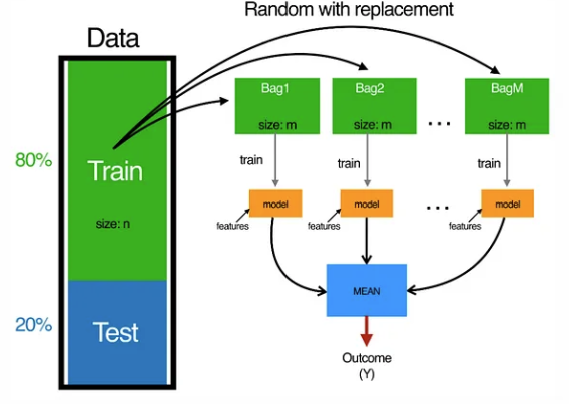

(image: [source](https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb))

🟢 **(Optional) Additional Classifiers**

---
There are more classifiers out there! We suggest that you read more on [XGBoost](https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349) if you are interested to learn more.


⚫ ***Coding Task***

---

In this coding task we will learn how to load and evaluate different models using Scikit-Learn.

For the purpose of this illustration, we will use the [Wine dataset](https://www.kaggle.com/code/cristianlapenta/wine-dataset-sklearn-machine-learning-project) as a toy dataset. The Wine dataset is a well-known dataset in the field of machine learning and is often used as a benchmark for classification algorithms. Here are some key details about the Wine dataset:

*  Features: The dataset comprises 13 different attributes (or features) for each wine sample. These attributes include various chemical properties such as alcohol, malic acid, ash, alkalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline.

* Labels: The target variable is the type of wine, which is a categorical variable with three classes, representing the three different types.

* The dataset contains 178 samples in total.

🟡🟡🟡 First, let's load the dataset. Before proceeding to the machine learning analysis we will also split the original dataset into training and testing datasets. Scikit learn has the built in function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) that allows us to randomly split the data. This is a common methodology in molecular design, but as we have discussed before, sometimes you might want to be more careful with this step. It's common that the test dataset is 20-30% of the original dataset.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
# Load a toy dataset
data = load_wine()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

🟡🟡🟡 Next, we will load and train the different classifiers:
* [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [XGBoostClassifier](https://xgboost.readthedocs.io/en/stable/python/python_intro.html#setting-parameters) (not imported from Scikit-Learn)

We recommend that you read the documentation of the classifiers to understand what is the rule of each parameter. As you can see, training is simple: we just need to call the `fit` method of each classifier on the training set.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Initialize the models
mlp = MLPClassifier(random_state=42)
svc = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the models
mlp.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

🟡🟡🟡 Finally, we will evaluate the trained models on the test set. The prediction is simple: we just use the `predict` method of each classifier. The evaluation is more tricky. Typically, the first metric you would be interest to see is the accuracy (or the error rate), but this might be misleading. You need to look at all of the following metrics to observe the bigger picture:

* **Accuracy**: This is the simplest metric. It is the ratio of correctly predicted observations to the total observations. Mathematically, it's defined as:

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

In a multi-class setting, this involves summing the true positives of each class and dividing by the total number of samples.

* **Precision**: This is the ratio of correctly predicted positive observations to the total predicted positive observations for each class, and then averaged (typically using a weighted or macro average). For a specific class $i$, it is defined as:

$$\text{Precision}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Positives}_i}$$

For the overall precision across all classes, it's the average:

$$\text{Precision} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_i,$$

where $N$ is the number of classes.

* **Recall**: This is the ratio of correctly predicted positive observations to the all observations in actual class for each class, and then averaged. For a specific class $i$, it's defined as:

$$\text{Recall}_i = \frac{\text{True Positives}_i}{\text{True Positives}_i + \text{False Negatives}_i}$$

And the overall recall:

$$\text{Recall} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_i$$

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Make predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Evaluate the models
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')


print("MLP: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}".format(accuracy_mlp, precision_mlp, recall_mlp))
print("SVC: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}".format(accuracy_svc, precision_svc, recall_svc))
print("Random Forest: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}".format(accuracy_rf, precision_rf, recall_rf))
print("XGBoost: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}".format(accuracy_xgb, precision_xgb, recall_xgb))

# 5. Research Problem

There are two coding tasks in this section. The first one is more open ended and the second one provides some code scaffold that you can work with. You can start with either one of them. Good luck!

In [ ]:
!pip install PyTDC # Installing the TDC package

⚫ ***Coding Task***

---
Recall the yields datasets that we worked with in lecture 2, where we also provided some code for forming the Morgan fingerprints. You can try to load either one or both of these datasets here and train a machine learning model to predict the reaction yields.

For this task you will need to use regression models. This is because yield is a continuous variable. You can think of regression as a classification problem where there are infinitely many categories, and we are trying to predict one category. The following models might be useful:

* [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)
* [Support Vector Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
* [Random Forest Regressor ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Then, you can try to analyze the performance of these models on the yield prediction task. Generally, yield prediction is a very challenging task as it's not always clear what are the reaction parameters that contribute to a high yield. In addition, we always induce a certain bias in the way we choose to encode the molecules (e.g., with Morgan fignerprints: do the structural patterns in the reactants and products influence the yield, or are there other factors such as the temperature in the reaction chamber that are more important?). Finally, you may apply the hueristic of "making the task simpler": try to group the yields into several discrete classes (e.g., "high yield", "middle-range yield", "low yield") and try to predict the classes using the classifiers that we have learned instead of the yield itself. Do you notice any imporvement? In your opinion, which approach is more practical?

⚫ ***Coding Task***

---
High-throughput screening (HTS) is the rapid automated testing of thousands to millions of samples for biological activity at the model organism, cellular, pathway, or molecular level. The assay readout can vary from target binding affinity to fluorescence microscopy of cells treated with drug. HTS can be applied to different kinds of therapeutics however most available data is from testing of small-molecule libraries. In this task, a machine learning model is asked to predict the experimental assay values given a small-molecule compound structure.

For this task we are going to use the [SARS-CoV-2 In Vitro](https://tdcommons.ai/single_pred_tasks/hts/) (Touret et al.) from [Therapeutics Data Commons](https://tdcommons.ai/), which has 1480 drugs. The downstream task is binary classification: fiven a drug SMILES string, predict its activity against SARSCoV2. Positive samples (active drugs) belong to class 1 and negative samples (inactive drugs) belong to class 0.


Your goals are as follows:
1. Recommend the best model for the downstream task. For this, you will have to choose the fingerprint type, the fingerprint dimension, and the machine learning model. Just as a reminder, these are the fingerprints and machine learning models that we have seen before:

*  Fingerprints:
  * Morgan
  * Atom Pairs
  * RDKit
  * Topological Torsion

* Machine Learning Models:
  * MLP
  * SVC
  * Random Forest
  * XGBoost


Typically, the following dimensions are being checked: $[64, 128, 256, 512, 1024, 2048, 4096]$. You are welcome to test more fingerprints, dimensions, and machine learning models.

This part is purely experimental, you will have to test all the possible combinations.

2. Based on your analysis in step (1), you will need to find the best combination. For this, you will have to devise a weighted metric as a function of the observable metric that we have covered: accuracy, precision, and recall. Here, you will also need to justify your choice: why did you choose a particualr weighting scheme? Hint: be critical about your results. Inspect the dataset.

3. After completing step (2), you will have the code to run an elementary machine learning analysis on any supervised learning task for a dataset that has molecular SMILES strings! You may find that the performance of the models may not be ideal. Suggest two different ways to improve the performance. A theoretical explanation is sufficient, you don't have to implement anything in this step.

4. Now it's the time to analyze the results. Encode the training dataset using the best fingerprint and dimension combination that you found in step (2). Choose some method for dimensionality reduction and visualize it using [molplotly](https://github.com/wjm41/molplotly). We have provided a sample code for how to use it. This will allow you to check what molecule some datapoint corresponds to when you hover over that datapoint. Finally, identify 3 clusters that have positive samples (effective drugs) in them. Inspect the clusters: identify what are the common structural features in the clusters and what distinguishes the positive sample in the cluster. Note: the clustering pattern may not be so obvious, but based on our experiments you should be able to identify some clusters where the closest few negative samples are structuraly similar to the positive sample in the cluster. Please attach a scren shot of the positive sample that you are referring to, and describe in words the structural patterns in the cluster (e.g., common ring system structure, presence of common functional groups, etc.).




We have provided a scaffold for these tasks that you may use. However, feel free to use your own code or make any necessary extensions based on what we have learned.

In [ ]:
!pip install PyTDC # Installing the TDC package

In [ ]:
from tdc.single_pred import HTS

data = HTS(name = 'SARSCoV2_Vitro_Touret') # Loading the dataset from TDC
split = data.get_split() # Obtain a train, validation, test split

In [ ]:
print(split) # It's always a good idea to inspect the dataset first!

In [ ]:
print(split['train']['Drug']) # The dataset is stored as a dictionary. Here's an example for how to read all the drug SMILES strings in the training dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Here we form the dataframes the you will use for the training and testing datasets. Notice that since you are not required to perform a validation, we have combined
# the training and validation datasets into `full_train_df`. We did this because the dataset isn't large (1480), so we might just skip the validation step. You are welcome to change this!

train_df = split['train']
valid_df = split['valid']
test_df = split['test']

full_train_df = pd.concat([train_df, valid_df])

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from rdkit import DataStructs

In [ ]:
def generate_fingerprints(df, fp_type, fp_size):
  """
  Generate molecular fingerprints from a DataFrame containing SMILES strings.

  This function takes a DataFrame, a fingerprint type, and a fingerprint size as input. It generates molecular fingerprints for the SMILES strings in the DataFrame
  using the specified fingerprint generation method and size. The generated fingerprints are returned as numpy arrays.

  Parameters:
  df: A DataFrame containing a 'Drug' column with SMILES strings representing the molecules. (pandas.DataFrame)
  fp_type: The type of fingerprint to generate. Supported values are 'morgan', 'rdkit', 'atom_pair', and 'topological_torsion'. (string)
  fp_size: The size of the generated fingerprint. It defines the length of the bit vector representing the fingerprint. (int)

  Returns:
    An array of numpy arrays, where each inner array is a fingerprint of the corresponding molecule in the input DataFrame. The fingerprints are represented as numpy arrays of integers. (numpy.ndarray)

  Example:
  >>> df = pd.DataFrame({'Drug': ['CCO', 'NCC']})
  >>> fps = generate_fingerprints(df, 'morgan', 1024)
  """

  # TODO
  # Complete the function based on the docstring

In [ ]:
def train_and_evaluate(fp_type, fp_size, train_data, test_data):
  """
  Train multiple classifiers on molecular fingerprints and evaluate their performance.

  This function takes molecular fingerprint type and size, training data, and test data as inputs. It first generates molecular fingerprints for both
  training and test datasets using the `generate_fingerprints` function. Then, it trains four different classifiers - MLP, SVC, Random Forest, and XGBoost - on the training data
  and evaluates their performance on the test data. The performance metrics include accuracy, precision, and recall. The results are returned as a dictionary.

  Parameters:
  fp_type: The type of fingerprint to generate. Supported values are 'morgan', 'rdkit', 'atom_pair', and 'topological_torsion'. (string)
  fp_size: The size of the generated fingerprint. It defines the length of the bit vector representing the fingerprint. (int)
  train_data: A DataFrame containing the training data. Must include a 'Drug' column for generating fingerprints and a 'Y' column for labels. (pandas.DataFrame)
  test_data: A DataFrame containing the test data. Structure should be the same as `train_data`. (pandas.DataFrame)

  Returns:
    A dictionary containing the performance results of each classifier. For each classifier, the dictionary provides its accuracy, precision, and recall scores.

  Notes:
  - The function relies on the 'generate_fingerprints' function to transform the SMILES strings in the 'Drug' column of the dataframes into molecular fingerprints.
  - The classifiers are trained to predict the values in the 'Y' column of the training and test dataframes.
  - The function uses standard scikit-learn classifier models: MLPClassifier, SVC, RandomForestClassifier. XGBClassifier can be imported from xgboost.
  - Performance is evaluated using accuracy, precision, and recall metrics.

  Example:
  >>> train_data = pd.DataFrame({'Drug': ['CCO', 'NCC'], 'Y': [1, 0]})
  >>> test_data = pd.DataFrame({'Drug': ['CCN', 'CCC'], 'Y': [0, 1]})
  >>> results = train_and_evaluate('morgan', 1024, train_data, test_data)
  """

  # TODO
  # Complete the function based on the docstring

In [ ]:
fp_types = ['morgan', 'rdkit', 'atom_pair', 'topological_torsion']
fp_sizes = [64, 128, 256, 512, 1024, 2048, 4096]
all_results = {}


def generate_results_dictionary(fp_types, fp_sizes, train_data, test_data):
  """
  Generates a dictionary of results for various combinations of fingerprint types and sizes.

  This function iterates over a list of fingerprint types and sizes, generating and evaluating machine learning models for each combination on the given training and testing datasets.
  It utilizes the `train_and_evaluate` function for training and evaluation. The results are aggregated in a dictionary, with keys representing the combination of fingerprint type and size,
  and values being the evaluation results.

  Parameters:
  fp_types: A list of fingerprint types to be used. Each type should be supported by the `generate_fingerprints` function. (list of strings)
  fp_sizes: A list of fingerprint sizes to be used for generating the fingerprints. (list of int)
  train_data: A DataFrame containing the training data. (pandas.DataFrame)
  test_data: A DataFrame containing the test data. (pandas.DataFrame)

  Returns:
    A dictionary where each key is a string in the format "{fp_type}_{fp_size}" and each value is a dictionary of evaluation results returned by `train_and_evaluate`.

  Example:
  >>> train_data = pd.DataFrame({'Drug': ['CCO', 'NCC'], 'Y': [1, 0]})
  >>> test_data = pd.DataFrame({'Drug': ['CCN', 'CCC'], 'Y': [0, 1]})
  >>> fp_types = ['morgan', 'rdkit']
  >>> fp_sizes = [1024, 2048]
  >>> results = generate_results_dictionary(fp_types, fp_sizes, train_data, test_data)
  """

  # TODO
  # Complete the function based on the docstring


def print_results(all_results):
  """
  Prints the evaluation results for each fingerprint type and size, and their respective classifiers.

  This function takes a dictionary of results generated by `generate_results_dictionary` and prints the results in a formatted manner.
  For each fingerprint type and size, it prints the performance metrics (accuracy, precision, recall) of each classifier.

  Parameters:
    all_results: A dictionary of evaluation results. Keys are strings in the format "{fp_type}_{fp_size}", and values are dictionaries of classifier results.

  Returns:
    None, this function does not return anything. It prints the results to the standard output.

  Example:
  >>> all_results = {
          'morgan_1024': {'MLP': {'accuracy': 0.8, 'precision': 0.75, 'recall': 0.8},
                          'SVC': {'accuracy': 0.7, 'precision': 0.7, 'recall': 0.7}},
          'rdkit_2048': {'MLP': {'accuracy': 0.85, 'precision': 0.8, 'recall': 0.85}}
      }
  >>> print_results(all_results)
  """

  # TODO
  # Complete the function based on the docstring

In [ ]:
results_dict = generate_results_dictionary(fp_types, fp_sizes, full_train_df, test_df)
print_results(results_dict)

In [ ]:
def find_best_model(results_dict, accuracy_weight, precision_weight, recall_weight):
  """
  Identifies the best model and fingerprint combination based on weighted performance metrics.

  This function iterates through the results dictionary, which contains evaluation metrics for different models and fingerprint combinations.
  For each model, it calculates a weighted score based on accuracy, precision, and recall, using the provided weights. The function then identifies
  the model with the highest weighted score, indicating the best overall performance according to the specified weights.

  Parameters:
  results_dict: A dictionary containing model evaluation results. The structure should be as follows:
                        { 'fingerprint_type_size': { 'classifier': {'accuracy': float, 'precision': float, 'recall': float}, ... }, ... }
  accuracy_weight: The weight to assign to the accuracy metric in the overall score calculation. (float)
  precision_weight: The weight to assign to the precision metric in the overall score calculation. (float)
  recall_weight: The weight to assign to the recall metric in the overall score calculation. (float)

  Returns:
    A tuple containing the best classifier name, fingerprint type and size combination, and the highest weighted score.
    Format: (classifier, 'fingerprint_type_size', weighted_score).

  Example:
  >>> results_dict = {
          'morgan_1024': {'MLP': {'accuracy': 0.8, 'precision': 0.75, 'recall': 0.8},
                          'SVC': {'accuracy': 0.7, 'precision': 0.7, 'recall': 0.7}},
          'rdkit_2048': {'MLP': {'accuracy': 0.85, 'precision': 0.8, 'recall': 0.85}}
      }
  >>> best_model = find_best_model(results_dict, 1, 1, 1)
  """

  # TODO
  # Complete the function based on the docstring


# Define your weights for each metric
accuracy_weight = # TODO: choose a weight for the accuracy score
precision_weight = # TODO: choose a weight for the precision score
recall_weight = # TODO: choose a weight for the recall score

# Assuming you have a results_dict from your previous computations
best_model = find_best_model(results_dict, accuracy_weight, precision_weight, recall_weight)
print(f"The best model is {best_model[0]} with fingerprint type and dimension {best_model[1]} and a score of {best_model[2]:.2f}")


🟡🟡🟡 Answer [justification of metric]:

🟡🟡🟡 Answer [suggestions for improving the performance]:

In [ ]:
!pip install molplotly

In [ ]:
from rdkit import Chem
import molplotly

In [ ]:
def get_fingerprints_and_mols(df, column_name, fp_type, fp_size):
  """
  Generates molecular fingerprints and retrieves SMILES strings from a DataFrame.

  This function takes a DataFrame, the name of the column containing SMILES strings, a fingerprint type, and a fingerprint size as input.
  It generates molecular fingerprints for the SMILES strings using the specified fingerprint generation method and size.
  It returns the generated fingerprints and the original SMILES strings.

  Parameters:
  df: A DataFrame containing molecular data. (pandas.DataFrame)
  column_name: The name of the column in `df` that contains SMILES strings. (string)
  fp_type: The type of fingerprint to generate. Supported values are 'morgan', 'rdkit', 'atom_pair', and 'topological_torsion'. (string)
  fp_size : The size of the generated fingerprint, defining the length of the bit vector representing the fingerprint. (int)

  Returns:
    A tuple containing two elements:
      - A numpy array of molecular fingerprints. Each fingerprint corresponds to a SMILES string in `df`.
      - A list of SMILES strings extracted from the specified column in `df`.

  Example:
  >>> df = pd.DataFrame({'SMILES': ['CCO', 'NCC']})
  >>> fps, smiles = get_fingerprints_and_mols(df, 'SMILES', 'morgan', 1024)
  """
  # TODO
  # Complete the function based on the docstring

# TODO: choose your fingerprint type and size
fp_type = # TODO: best fingerprint type from part 2
fp_size = # TODO: best fingerprint dimension from part 2
fingerprints, smiles = get_fingerprints_and_mols(full_train_df, 'Drug', fp_type, fp_size)

In [ ]:
from sklearn.manifold import TSNE

# TODO: run t-SNE visualization on the `fingerprints` that you found in the code cell above

In [ ]:
import plotly.express as px
import molplotly

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['smiles'] = smiles
tsne_df['class'] = list(full_train_df['Y'])


In [ ]:
fig = px.scatter(tsne_df, x="x", y="y", color="class", hover_data=["smiles", "class"])

app = molplotly.add_molecules(fig=fig,
                              df=tsne_df,
                              smiles_col='smiles',
                              title_col='analysis for the SARSCoV2 Vitro Touret dataset')

app.run_server(mode='inline', port=8700, height=1000)

🟡🟡🟡 Answer [result analysis]:

# References

1. Capecchi, A., Probst, D. & Reymond, JL. One molecular fingerprint to rule them all: drugs, biomolecules, and the metabolome. J Cheminform 12, 43 (2020). https://doi.org/10.1186/s13321-020-00445-4

2. H. L. Morgan
Journal of Chemical Documentation 1965 5 (2), 107-113
DOI: 10.1021/c160017a018